In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

%load_ext tensorboard

In [2]:
# train_dir = "./Large/train/"
# val_dir = "./Large/validation/"
train_dir = "./custom_dataset/train/"
val_dir = "./custom_dataset/validation/"

train_files = os.listdir(train_dir)
train_files.sort()
val_files = os.listdir(val_dir)
val_files.sort()

print(train_files)
print(val_files)

train_image_paths = []
train_image_labels = []

['face_02.jpg', 'face_02.txt', 'face_08.jpg', 'face_08.txt', 'face_14.jpg', 'face_14.txt', 'face_15.jpg', 'face_15.txt', 'face_17.jpg', 'face_17.txt', 'face_18.jpg', 'face_18.txt', 'face_19.jpg', 'face_19.txt', 'face_23.jpg', 'face_23.txt', 'face_24.jpg', 'face_24.txt', 'face_25.jpg', 'face_25.txt', 'face_26.jpg', 'face_26.txt', 'face_27.jpg', 'face_27.txt', 'face_28.jpg', 'face_28.txt', 'face_31.jpg', 'face_31.txt', 'face_32.jpg', 'face_32.txt', 'face_35.jpg', 'face_35.txt', 'face_37.jpg', 'face_37.txt', 'face_38.jpg', 'face_38.txt', 'face_39.jpg', 'face_39.txt', 'face_40.jpg', 'face_40.txt', 'face_41.jpg', 'face_41.txt', 'face_42.jpg', 'face_42.txt', 'face_43.jpg', 'face_43.txt', 'face_45.jpg', 'face_45.txt', 'face_46.jpg', 'face_46.txt', 'face_47.jpg', 'face_47.txt', 'face_49.jpg', 'face_49.txt', 'face_50.jpg', 'face_50.txt', 'face_51.jpg', 'face_51.txt', 'face_53.jpg', 'face_53.txt', 'face_54.jpg', 'face_54.txt', 'face_55.jpg', 'face_55.txt', 'face_56.jpg', 'face_56.txt', 'image_0.

In [3]:
for i in train_files:
    if i.endswith(".jpg"):
        train_image_paths.append(train_dir + i)
    else:
        train_image_labels.append(train_dir + i)

val_image_paths = []
val_image_labels = []

for i in val_files:
    if i.endswith(".jpg"):
        val_image_paths.append(val_dir + i)
    else:
        val_image_labels.append(val_dir + i)

train_image_paths.sort()
train_image_labels.sort()
val_image_paths.sort()
val_image_labels.sort()

print(len(train_image_paths), len(train_image_labels))

606 606


In [34]:

train_images = []
train_images_resized = []
train_labels = []

val_images = []
val_images_resized = []
val_labels = []

IMAGE_SCALE_FACTOR = 2
O_IMG_WIDTH = 640
O_IMG_HEIGHT = 480

IMG_WIDTH = int(O_IMG_WIDTH / IMAGE_SCALE_FACTOR)
IMG_HEIGHT = int(O_IMG_HEIGHT / IMAGE_SCALE_FACTOR)


In [5]:

for image in train_image_paths:
    arr = np.array(plt.imread(image))
    arr = arr / 255
    train_images.append(arr)
    arr = arr[::IMAGE_SCALE_FACTOR, ::IMAGE_SCALE_FACTOR]
    train_images_resized.append(arr)

for image in val_image_paths:
    arr = np.array(plt.imread(image))
    arr = arr / 255
    val_images.append(arr)
    arr = arr[::IMAGE_SCALE_FACTOR, ::IMAGE_SCALE_FACTOR]
    val_images_resized.append(arr)

for label in train_image_labels:
    arr = np.loadtxt(label)
    train_labels.append(arr[1:])

for label in val_image_labels:
    arr = np.loadtxt(label)
    val_labels.append(arr[1:])

print(train_images[0].shape)

train_images = np.array(train_images)
train_images_resized = np.array(train_images_resized)

val_images = np.array(val_images)
val_images_resized = np.array(val_images_resized)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

print(train_images_resized.shape)

(480, 640, 3)
(606, 120, 160, 3)


In [6]:

print(" ------------- Importing TF ------------- ")

import tensorflow as tf
import tensorflow.keras.backend as K

print("------------- Creating Model ------------- ")

lr=0.01

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

print("------------- Compiling Model ------------- ")

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')
K.set_value(model.optimizer.learning_rate, lr)

print("------------- Training Model ------------- ")

# print shapes with strings
print("train_images shape: ", train_images.shape)
print("train_images_resized shape: ", train_images_resized.shape)
print("train_labels shape: ", train_labels.shape)
print("val_images shape: ", val_images.shape)
print("val_images_resized shape: ", val_images_resized.shape)



 ------------- Importing TF ------------- 
------------- Creating Model ------------- 
------------- Compiling Model ------------- 
------------- Training Model ------------- 
train_images shape:  (606, 480, 640, 3)
train_images_resized shape:  (606, 120, 160, 3)
train_labels shape:  (606, 4)
val_images shape:  (233, 480, 640, 3)
val_images_resized shape:  (233, 120, 160, 3)


In [21]:
batch_size = 1

dataset = tf.data.Dataset.from_tensor_slices((train_images_resized, train_labels))
# reshape
dataset = dataset.batch(batch_size)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(dataset, epochs=1, validation_data=(val_images_resized, val_labels), callbacks=[tensorboard_callback])

606/606 [==============================] - 104s 171ms/step - loss: 0.7170 - accuracy: 0.6485 - val_loss: 0.6685 - val_accuracy: 0.6738


In [ ]:
%tensorboard --logdir logs/fit
print(train_images_resized[0][0][0])

In [29]:
# laod
model = tf.keras.models.load_model('./model/maybe.h5')

In [22]:
model.save("./model/stupid-ah-goody-aH.keras")

In [30]:
print("------------- Testing Model ------------- ")

from PIL import Image
from matplotlib import patches as patches


------------- Testing Model ------------- 


In [31]:
def drawPoint(x, y, w, h, c="r"):
    axis.add_patch(patches.Rectangle((int(x - w/2), int(y - h/2)), int(w), int(h), facecolor="none", edgecolor=c))

In [36]:
test_img = plt.imread("./custom_dataset-1/train/face_38.jpg")

test_label = np.loadtxt("./custom_dataset-1/train/face_38.txt")[1:]

x, y, w, h = test_label

x*=O_IMG_WIDTH
y*=O_IMG_HEIGHT
w*=O_IMG_WIDTH
h*=O_IMG_HEIGHT

figure, axis = plt.subplots()

drawPoint(x, y, w, h, "r")

axis.imshow(test_img)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './custom_dataset-1/train/face_38.jpg'

1/1 [==============================] - 0s 48ms/step
0.40372962 0.35654932 0.31952012 0.4360185
0.66875 0.30833333333333335 0.275 0.4625


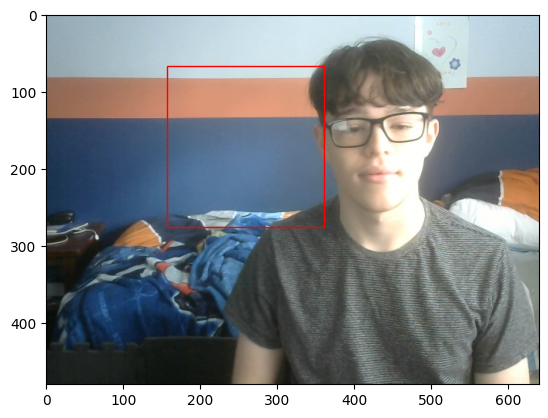

In [38]:
test_img_path = "./custom_dataset/train/face_08.jpg"
test_label_path = "./custom_dataset/train/face_08.txt"
# test model
model_test_image = plt.imread(test_img_path)
# model_test_image = 
# model_test_label = np.loadtxt("./custom_dataset-1/validation/face_11.txt")[1:]
model_test_label = model.predict(np.array([plt.imread(test_img_path)[::IMAGE_SCALE_FACTOR, ::IMAGE_SCALE_FACTOR]]))[0]
real_test_label = np.loadtxt(test_label_path)[1:]

x, y, w, h = model_test_label

print(x, y, w, h)
print(real_test_label[0], real_test_label[1], real_test_label[2], real_test_label[3])
    
x*=O_IMG_WIDTH
y*=O_IMG_HEIGHT
w*=O_IMG_WIDTH
h*=O_IMG_HEIGHT

figure1, axis1 = plt.subplots()

axis1.add_patch(patches.Rectangle((int(x - w/2), int(y - h/2)), int(w), int(h), facecolor="none", edgecolor="r"))

axis1.imshow(model_test_image)


In [39]:
# test using webcam
import cv2
import time

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    # test model
    model_test_image = frame
    # model_test_image =
    # model_test_label = np.loadtxt("./custom_dataset-1/validation/face_11.txt")[1:]
    model_test_label = model.predict(np.array([model_test_image[::IMAGE_SCALE_FACTOR, ::IMAGE_SCALE_FACTOR]]))[0]
    real_test_label = np.loadtxt(test_label_path)[1:]
    
    x, y, w, h = model_test_label
        
    x*=O_IMG_WIDTH
    y*=O_IMG_HEIGHT
    w*=O_IMG_WIDTH
    h*=O_IMG_HEIGHT
    
    cv2.rectangle(frame, (int(x - w/2), int(y - h/2)), (int(x + w/2), int(y + h/2)), (0, 0, 255), 2)
    
    cv2.imshow("frame", frame)    

    if cv2.waitKey(1) == ord('q'):
        break
        

1/1 [==============================] - 0s 34ms/step


: 